In [21]:
from __future__ import division
from collections import defaultdict
from collections import Counter

import os
import random
import json

In [22]:

source_dir = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\book-nlp-master\\book-nlp-master\\data\\originalTexts"
# for filename in os.listdir(source_dir):
#     print filename
#     bookfile = open(source_dir + "\\" + filename, 'r')
#     book = bookfile.read()
#     bookDict = defaultdict(float)
#     for word in book.split():
#         bookDict[word] += 1
#     counter = Counter(bookDict)
#     top_n = counter.most_common(100)
#     print top_n
bookfile = open(source_dir + '\\full_hp.txt', 'r')
book = bookfile.read()
bookDict = defaultdict(float)
for word in book.split():
    bookDict[word] += 1
counter = Counter(bookDict)
top_n = counter.most_common(200)
print top_n
print

[('the', 47552.0), ('to', 26268.0), ('and', 25179.0), ('of', 21444.0), ('a', 19852.0), ('.', 17618.0), ('was', 15155.0), ('he', 14435.0), ('his', 13612.0), ('said', 12682.0), ('in', 11952.0), ('Harry', 11326.0), ('had', 9954.0), ('that', 8840.0), ('at', 8322.0), ('you', 8044.0), ('it', 7310.0), ('I', 7282.0), ('as', 7026.0), ('with', 6272.0), ('on', 6097.0), ('for', 5193.0), ('He', 4990.0), ('not', 4666.0), ('\xc2\x91', 4527.0), ('her', 4418.0), ('they', 4259.0), ('be', 4258.0), ('were', 4155.0), ('but', 4010.0), ('from', 3997.0), ('have', 3970.0), ('out', 3847.0), ('him', 3806.0), ('\xe2\x80\x94', 3561.0), ('she', 3462.0), ('up', 3432.0), ('into', 3427.0), ('Ron', 3366.0), ('all', 3336.0), ('The', 3250.0), ('been', 3136.0), ('Hermione', 3119.0), ('what', 2798.0), ('could', 2668.0), ('back', 2595.0), ('who', 2581.0), ('their', 2497.0), ('is', 2491.0), ('them', 2482.0), ('Harry,', 2400.0), ('\xe2\x80\x9cI', 2326.0), ('looked', 2321.0), ('about', 2282.0), ('so', 2241.0), ('this', 2197.0)

In [23]:
wk_dir = os.path.dirname(os.path.realpath('__file__'))

#json_filename = os.path.join(wk_dir, "..", "booknlp_output\\potter.all.book.txt")
json_filename = "C:\\Users\\Molly\\Google Drive\\senior classes\\nlp\\term_project\\char-net\\booknlp_output\potter.all.book";

with open(json_filename) as json_file:
	char_json = json.load(json_file)
print "successfully loaded json"

successfully loaded json


In [24]:
# TODO: add stopword removal (this is temporary, pull words from a file or something?)
import nltk

stopwords = nltk.corpus.stopwords.words('english')
curDir = os.path.dirname(os.path.realpath('__file__'))
stop = os.path.join(curDir,'stopwords')     
stopfile = open(stop, 'r')
stop = stopfile.read()
for word in stop.split():
    stopwords.append(word)
print stopwords
stopwords = set(stopwords)

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

In [25]:
# dictionary of lists of character attributes, indexed by name (i.e. character's "bag of words")
characters = {}

for character in char_json["characters"]:
    # TODO: throw out characters that are mentioned less than 10 times (play with this threshold?)
    if character["NNPcount"] > 20:
        char_name = character["names"][0]['n']
        characters[char_name] = []
        for word_dict in character["patient"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_PATIENT")
        for word_dict in character["agent"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_AGENT")
        for word_dict in character["mod"]:
            curWord = word_dict['w']
            if curWord not in stopwords:
                characters[char_name].append(curWord + "_MOD")
                
        #TODO: add dialogue features?
#         for word_dict in character['speaking']:
#             print word_dict['w']
                
        # are things characters possess indicative of their character? Often not, so maybe exclude
        for word_dict in character["poss"]:
            characters[char_name].append(word_dict['w'] + "_POSS")

texts = [None for i in range(len(characters))]
names = defaultdict(float)
i = 0
for key, value in characters.iteritems():
	print str(key) + ": " + str(value)
	texts[i] = value
	names[key] = i
	i += 1
	print

Madam Rosmerta: [u'forced_PATIENT', u'gasped_PATIENT', u'breathed_PATIENT', u'staring_AGENT', u'filling_AGENT', u'eject_wizard_AGENT', u'tottering_AGENT', u'send_bottle_AGENT', u'have_other_AGENT', u'saw_AGENT', u'tip_you_AGENT', u'help_[Malfoy/Lucius Malfoy/Mr. Malfoy]_AGENT', u'admitted_AGENT', u'sounded_AGENT', u'have_cold_AGENT', u'let_sigh_AGENT', u'able_MOD', u'mead_POSS', u'pub_POSS', u'bathroom_POSS', u'messages_POSS', u'talking_POSS', u'voice_POSS', u'voice_POSS', u'voice_POSS', u'nose_POSS']

Fang: [u'take_PATIENT', u'swept_PATIENT', u'bless_PATIENT', u'take_PATIENT', u'fended_PATIENT', u'leave_PATIENT', u'carrying_PATIENT', u'pushed_PATIENT', u'bowled_PATIENT', u'stroking_PATIENT', u'found_PATIENT', u'want_PATIENT', u'transfixed_PATIENT', u'started_AGENT', u'bounded_AGENT', u'let_AGENT', u'yelped_AGENT', u'kept_AGENT', u'whimpering_AGENT', u'fighting_AGENT', u'thudded_AGENT', u'howling_AGENT', u'howling_AGENT', u'fling_himself_AGENT', u'trembling_AGENT', u'ter_AGENT', u'shov

In [26]:
from gensim import corpora, models, similarities 
 
# create Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

# create bag of words model to perform analysis
corpus = [dictionary.doc2bow(text) for text in texts]

numtopics = 4

lda = models.LdaModel(corpus, num_topics=numtopics, 
                            id2word=dictionary, 
                            update_every=5, 
                            chunksize=100, 
                            passes=100)


In [27]:
print(lda.show_topics())

[u'0.015*face_POSS + 0.014*eyes_POSS + 0.013*wand_POSS + 0.010*head_POSS + 0.010*hand_POSS + 0.010*voice_POSS + 0.005*turned_AGENT + 0.005*mouth_POSS + 0.005*feet_POSS + 0.005*hands_POSS', u'0.014*eyes_POSS + 0.013*head_POSS + 0.012*wand_POSS + 0.010*felt_AGENT + 0.010*thought_AGENT + 0.010*face_POSS + 0.009*hand_POSS + 0.007*saw_AGENT + 0.007*feet_POSS + 0.005*heard_AGENT', u'0.003*diary_POSS + 0.002*sister_POSS + 0.002*house_POSS + 0.002*SCOOP_POSS + 0.002*article_POSS + 0.001*tell_I_AGENT + 0.001*handbag_POSS + 0.001*room_POSS + 0.001*memory_POSS + 0.001*whistle_POSS', u'0.013*eyes_POSS + 0.011*wand_POSS + 0.009*face_POSS + 0.007*voice_POSS + 0.005*office_POSS + 0.004*head_POSS + 0.004*turned_AGENT + 0.004*hand_POSS + 0.004*cage_POSS + 0.003*cabin_POSS']


In [28]:
import numpy as np

# topics_matrix = lda.show_topics(num_topics=20, formatted=False, num_words=50)
# topics_matrix = np.array(topics_matrix)

# topic_words = topics_matrix[:,:,1]
# for i in topic_words:
#     print count
#     print([str(word) for word in i])
#     print()

for i in range(0, numtopics):
    print i
    print lda.show_topic(i, 10)
    print

0
[(0.015353894600453378, u'face_POSS'), (0.014044263690026398, u'eyes_POSS'), (0.013095197640998479, u'wand_POSS'), (0.009891879818231402, u'head_POSS'), (0.0097713365103428134, u'hand_POSS'), (0.0095700298914727054, u'voice_POSS'), (0.0052737683509670608, u'turned_AGENT'), (0.0050906071561936965, u'mouth_POSS'), (0.0049925986301687618, u'feet_POSS'), (0.0049162040836636996, u'hands_POSS')]

1
[(0.013541343508588271, u'eyes_POSS'), (0.012660544625701278, u'head_POSS'), (0.011966198758275395, u'wand_POSS'), (0.010228536925201695, u'felt_AGENT'), (0.010171488058519381, u'thought_AGENT'), (0.0098318331656028907, u'face_POSS'), (0.0085854424803159107, u'hand_POSS'), (0.0074278265965816116, u'saw_AGENT'), (0.0066570674023105408, u'feet_POSS'), (0.0050010021735732418, u'heard_AGENT')]

2
[(0.0029977198731414205, u'diary_POSS'), (0.0020396004267368871, u'sister_POSS'), (0.0017173903272838177, u'house_POSS'), (0.0017065255101200388, u'SCOOP_POSS'), (0.0015220091363843192, u'article_POSS'), (0

In [29]:
topic_matrix = [[0 for i in range(numtopics)] for namekey in names]
print len(topic_matrix)
i = 0
for namekey in names:
    print str(namekey) + " topic distribution: "
    for (key, value) in lda[corpus[names[namekey]]]:
        topic_matrix[i][key] = value
    i+=1
    print lda[corpus[names[namekey]]]

159
Madam Rosmerta topic distribution: 
[(0, 0.97133993633775673)]
Fang topic distribution: 
[(0, 0.99392861964113188)]
Hogsmeade topic distribution: 
[(0, 0.021652927298755512), (1, 0.021401795050078446), (2, 0.02085246325558399), (3, 0.93609281439558201)]
Lupin topic distribution: 
[(0, 0.38854141093806133), (1, 0.61050190975590979)]
Dudley topic distribution: 
[(0, 0.99911248349177728)]
Cho topic distribution: 
[(1, 0.74154795050181965), (2, 0.25509338721534225)]
Roger Davies topic distribution: 
[(1, 0.97929741869877851)]
Dolohov topic distribution: 
[(0, 0.97793235970141679)]
Madam Hooch topic distribution: 
[(0, 0.53216112359891032), (2, 0.45748517531262756)]
Ravenclaw topic distribution: 
[(0, 0.0154085013255534), (1, 0.01629172143364771), (2, 0.95311517734781914), (3, 0.015184599892979714)]
Dad topic distribution: 
[(0, 0.97434606197349793)]
Lavender Brown topic distribution: 
[(0, 0.69614134449227694), (1, 0.2803945556092135), (2, 0.01141249116009046), (3, 0.012051608738419178

In [30]:
import numpy as np
from sklearn import metrics
data = np.array(topic_matrix)

from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
clusters = kmeans.labels_.tolist()
print clusters
# "The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters."
goodness = metrics.silhouette_score(data, kmeans.labels_, metric='euclidean')
print "silhouette score: " + str(goodness)
# within-cluster sum of squares
print "inertia: " + str(kmeans.inertia_)

[0, 0, 2, 1, 0, 1, 1, 0, 3, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 3, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 3, 0, 0, 3, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 3, 3, 0, 2, 3, 0, 0, 1, 0, 2, 1, 3, 0, 1, 0, 3, 3, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0]
silhouette score: 0.703987942472
inertia: 8.85694485262


In [31]:
dic={}
i=0
for nameKey in names:
    dic[str(nameKey)]=clusters[i]
    i += 1
d=sorted(dic.items(), key=lambda x:x[1])
for name in d:
    print name

('Madam Rosmerta', 0)
('Fang', 0)
('Dudley', 0)
('Dolohov', 0)
('Dad', 0)
('Lavender Brown', 0)
('Malfoys', 0)
('Montague', 0)
('Marietta', 0)
('Macnair', 0)
('Moody', 0)
('Krum', 0)
('Bellatrix', 0)
('Yaxley', 0)
('Kendra', 0)
('Mr. Roberts', 0)
('Ministry of Magic', 0)
('Hogwarts Express', 0)
('Michael Corner', 0)
('Draco', 0)
('George', 0)
('Mr. Diggory', 0)
('Fleur', 0)
('Aberforth', 0)
('Beauxbatons', 0)
('Vernon Dursley', 0)
('Goyle', 0)
('Crabbe', 0)
('Madam Pomfrey', 0)
('Frank', 0)
('Uncle Vernon', 0)
('Nicolas Flamel', 0)
('Neville', 0)
('Charlie', 0)
('Malfoy', 0)
('Arthur', 0)
('Padma', 0)
('Viktor Krum', 0)
('Gringotts', 0)
('Dean', 0)
('Mr. Crouch', 0)
('Percy', 0)
('Mrs. Figg', 0)
('Katie', 0)
('Parvati', 0)
('Nick', 0)
('Hufflepuff', 0)
('Lily', 0)
('Sirius', 0)
('Marge', 0)
('Lee Jordan', 0)
('Justin', 0)
('McLaggen', 0)
('Morfin', 0)
('Grawp', 0)
('Mark', 0)
('Seamus', 0)
('Amos Diggory', 0)
('Ron', 0)
('Muriel', 0)
('Ernie', 0)
('Mr. Weasley', 0)
('Umbridge', 0)
('Fr

In [32]:
import pandas as pd
tempNameList = [nameKey for nameKey in names]
charClusts = {'characters': tempNameList, 'clusters': clusters}
frame = pd.DataFrame(charClusts, index = [clusters] , columns = ['character', 'clusters'])

In [33]:
frame['clusters'].value_counts() 

0    80
1    34
2    28
3    17
Name: clusters, dtype: int64

In [34]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

# get euclidean distance between each character's topic vector
dist = euclidean_distances(data, data)

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
    
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=tempNameList)) 

#group by cluster
groups = df.groupby('label')

In [35]:
cluster_colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c'}
#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1',
                 2: '2', 
                 3: '3', 
                }

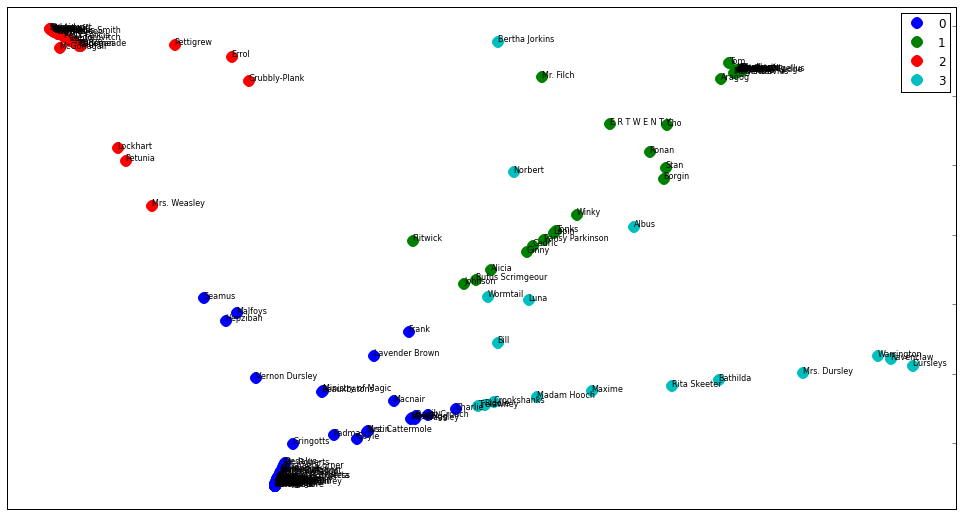

In [36]:
#The following is taken word for word from this tutorial: http://brandonrose.org/clustering

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  



plt.show() #show the plot


In [37]:
#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)
plt.close()

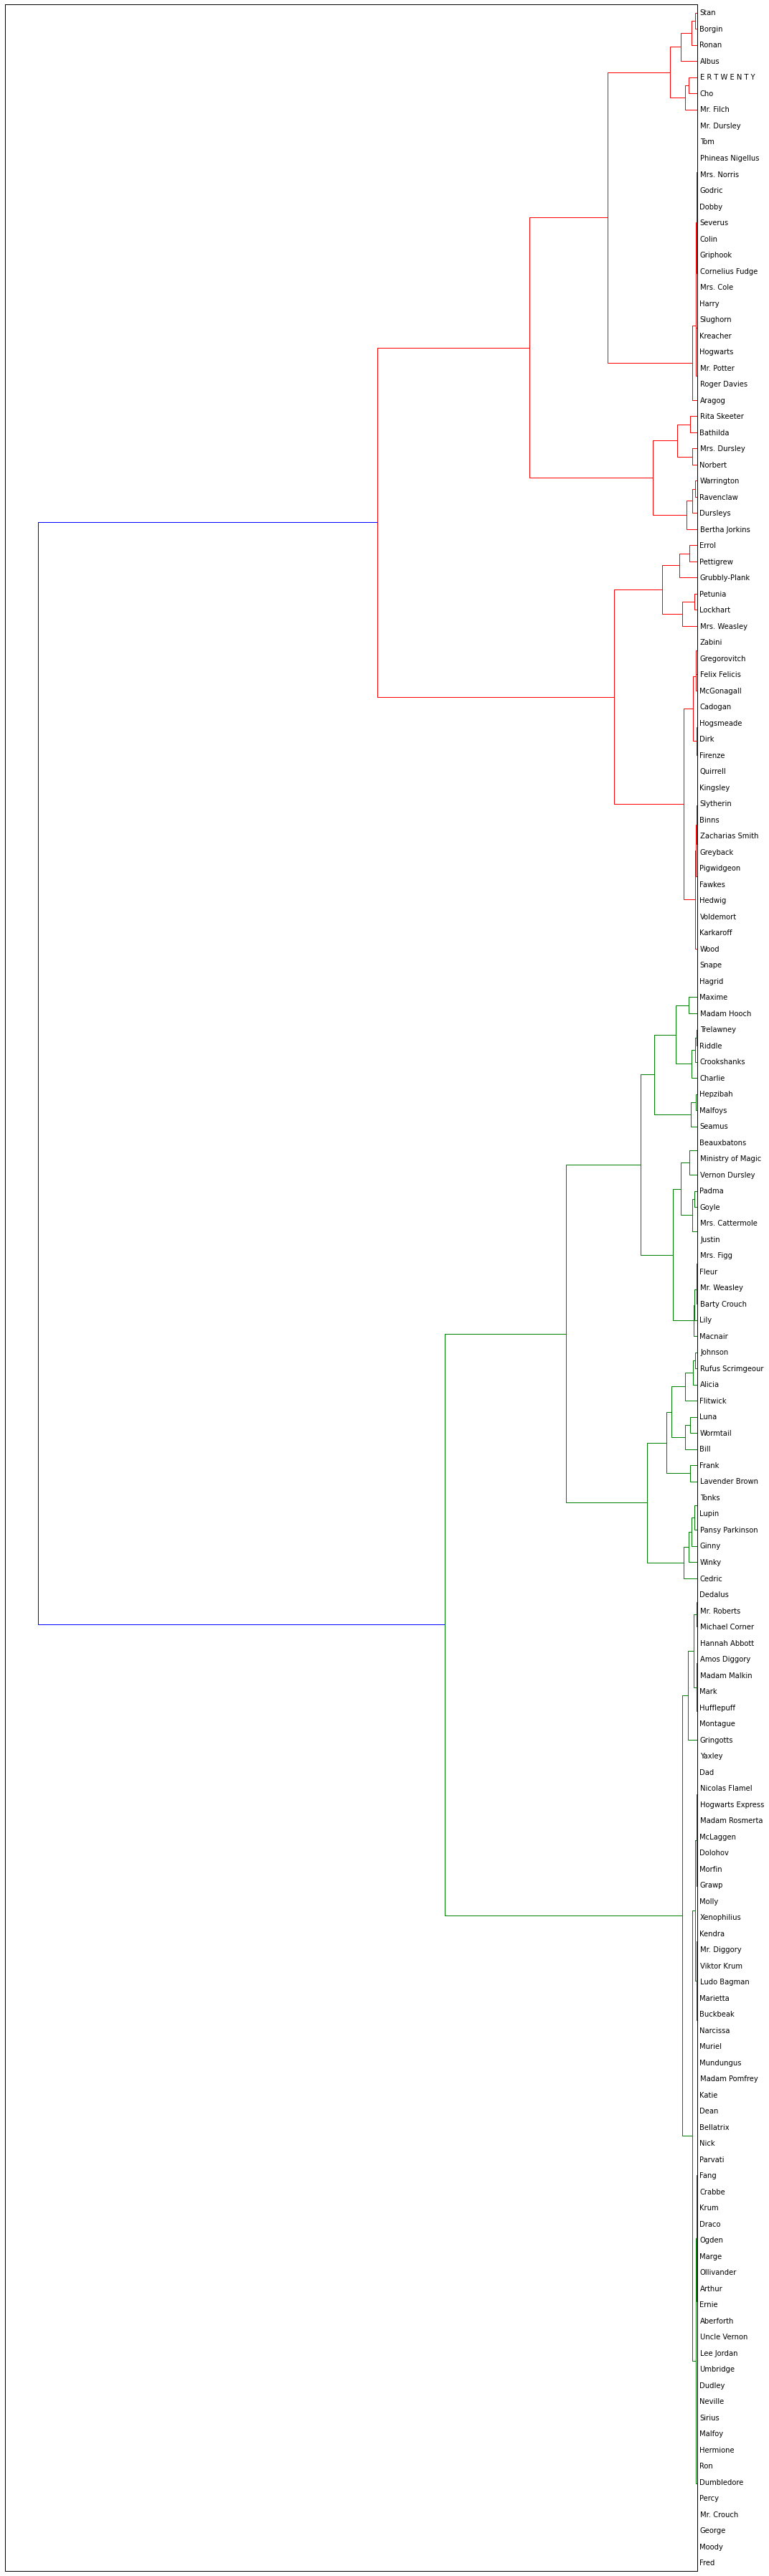

In [38]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 50)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=charClusts['characters']);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters